In [1]:
import yaml, json
from glob import glob

In [90]:
# all_metrics = glob(f'/home/ws/tb0536/logs/medaka-supervised/2021-11-05_16-46-07/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+dataset=eyes_randomized,+model=eyes_pfpn_sorting,attempts=*,logger.project_name=null/logdir/checkpoints/_metrics.json')
addr_simclr = '/home/ws/tb0536/logs/medaka-supervised/simclr_2021-11-08_13-20-33/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+dataset=eyes_randomized,+model=eyes_pfpn_simclr,attempts=*,logger.project_name=null,sweep_prefix=*/logdir/checkpoints/_metrics.json'
addr_scratch = '/home/ws/tb0536/logs/medaka-supervised/scratch_2021-11-09_10-07-05/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+dataset=eyes_randomized,+model=eyes_pfpn_scratch,attempts=*,logger.project_name=null,sweep_prefix=*/logdir/checkpoints/_metrics.json'
addr_sorting = '/home/ws/tb0536/logs/medaka-supervised/sorting_2021-11-10_08-34-26/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+dataset=eyes_randomized,+model=eyes_pfpn_sorting,attempts=*,logger.project_name=null,sweep_prefix=*/logdir/checkpoints/_metrics.json'
addr_simclr2 = '/home/ws/tb0536/logs/medaka-supervised/simclr2_2021-11-11_08-39-12/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+dataset=eyes_randomized,+model=eyes_pfpn_simclr2,attempts=*,logger.project_name=null,sweep_prefix=*/logdir/checkpoints/_metrics.json'
addr_sorting_u = '/home/ws/tb0536/logs/medaka-supervised/sorting_u_2021-11-12_10-19-53/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+dataset=eyes_randomized,+model=eyes_pfpn_sorting_u,attempts=*,logger.project_name=null,sweep_prefix=*/logdir/checkpoints/_metrics.json'

In [88]:
all_partitions = ['1.0', '0.1', '0.01']

In [74]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline

In [5]:
all_runs = {}

In [113]:
addresses = {
    'simclr': addr_simclr,
    'simclr-inside': addr_simclr2,
#     'none': addr_scratch, 
    'sorting': addr_sorting,
    'sorting-noncropped': addr_sorting_u
}

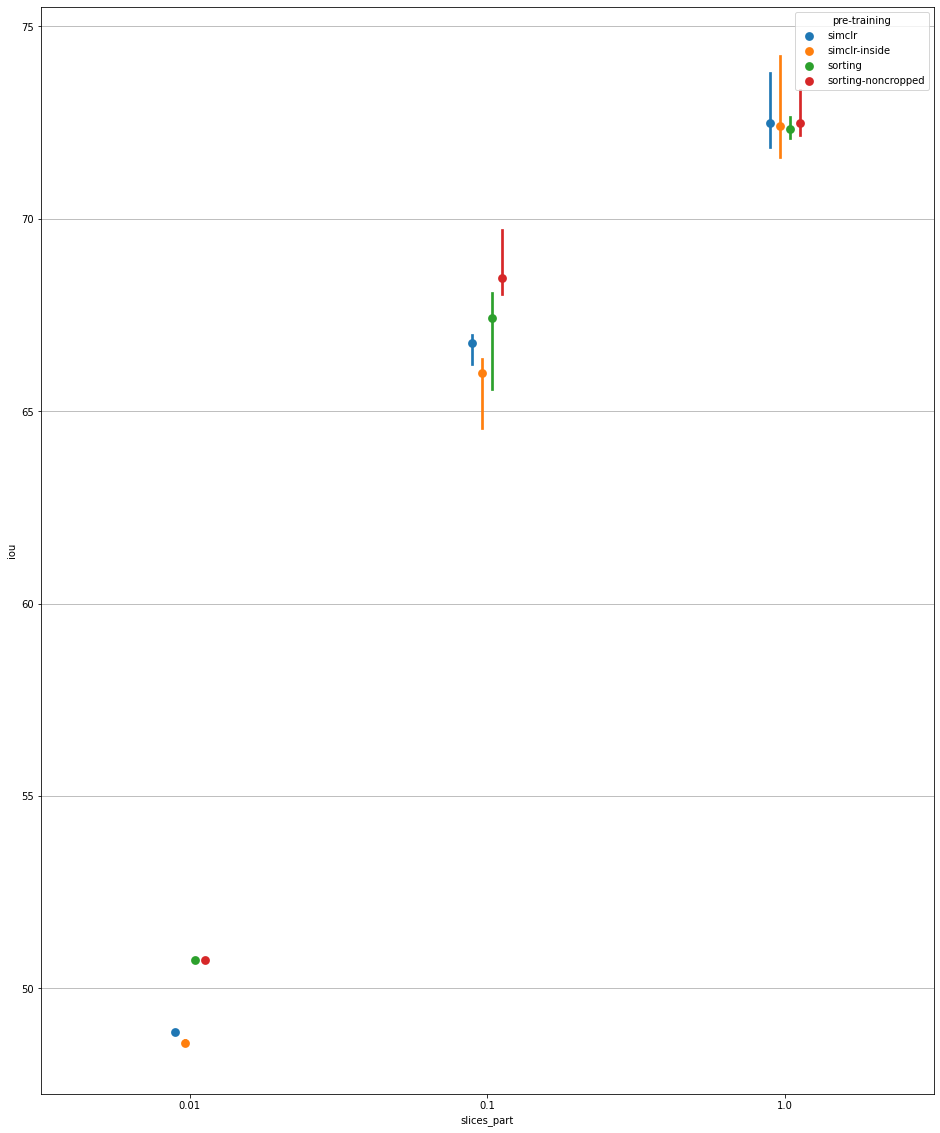

In [131]:
all_runs = []
for name, address in addresses.items():
    for slc_partition in all_partitions:
        all_metrics = glob(address.format(part=slc_partition))
        for metric in all_metrics:
            with open(metric) as f:
                metric_data = json.load(f)
            current_measure = {'pre-training': name, 
                               'slices_part': float(slc_partition), 
                               'iou': metric_data['best']['mean-iou']}
            all_runs.append(current_measure)

all_runs = pd.DataFrame(all_runs)

plt.figure(figsize=(16, 20))
sns.pointplot(data=all_runs, x='slices_part', y='iou', hue='pre-training', dodge=True, join=False, ci=100)
loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
plt.gca().yaxis.set_major_locator(loc)
plt.grid(which='both', axis='y')
plt.show()

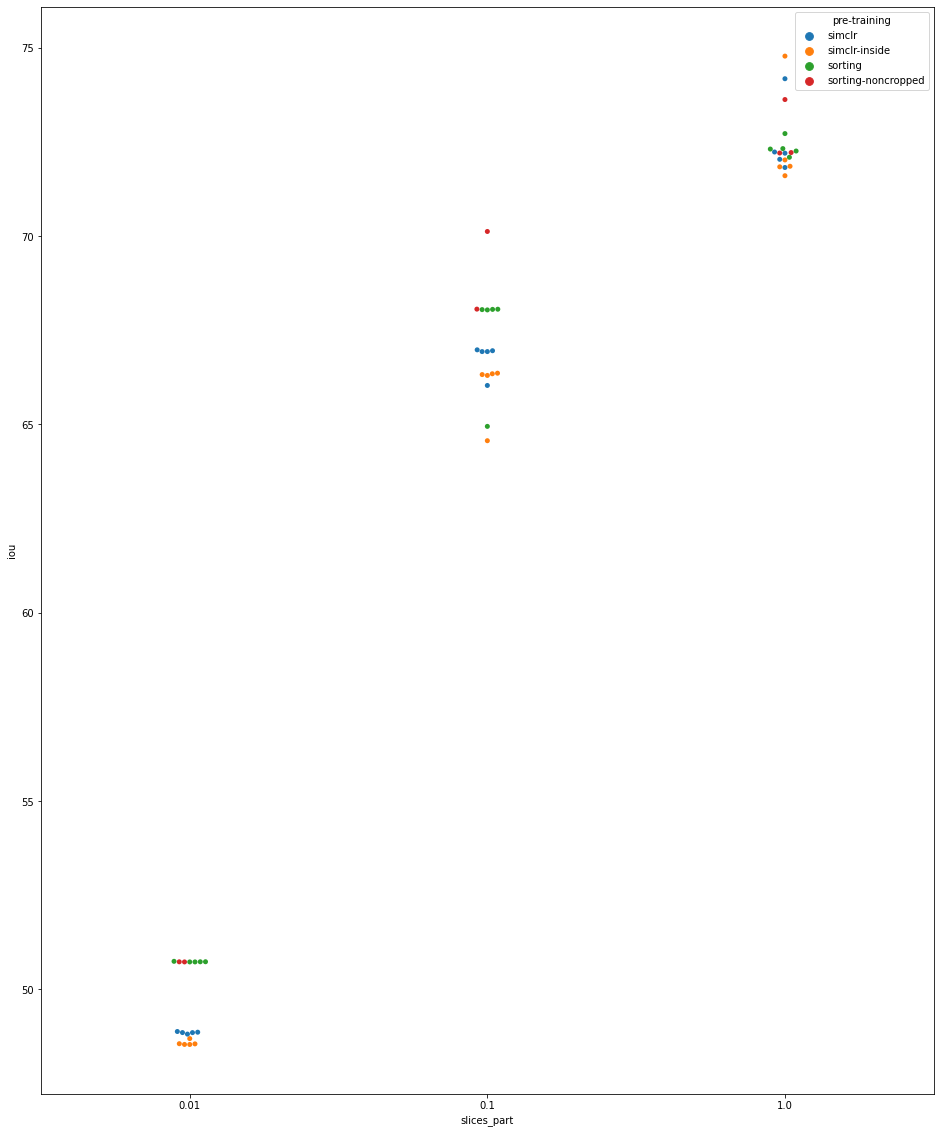

In [127]:
plt.figure(figsize=(16, 20))
# sns.boxplot(x="slices_part", y="iou", hue="pre-training", data=all_runs, width=0.1)
sns.swarmplot(x="slices_part", y="iou", hue="pre-training", data=all_runs)
# sns.pointplot(data=all_runs, x='slices_part', y='iou', hue='pre-training', ci=None, scale=0.3, marker='D')
# sns.violinplot(x="slices_part", y="iou", hue="pre-training", data=pd.DataFrame(all_runs))
plt.show()

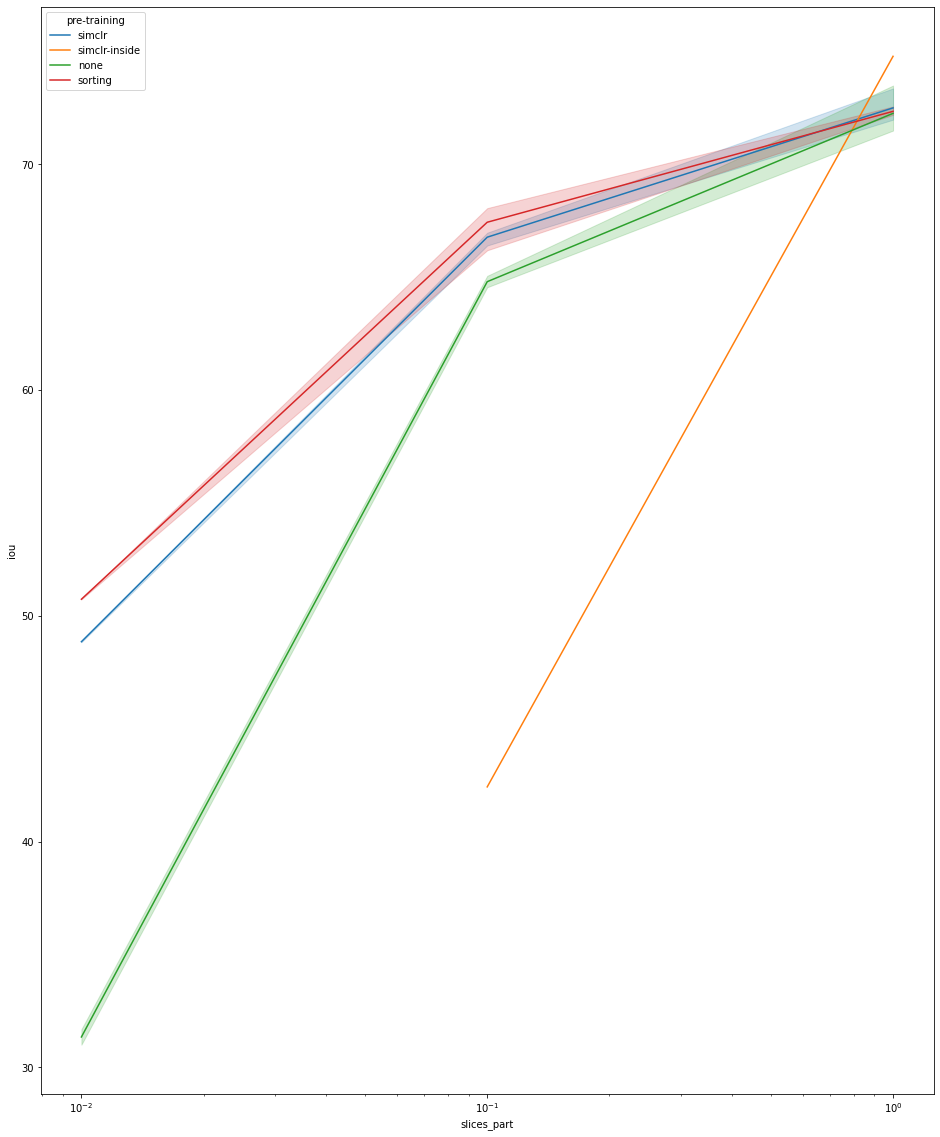

In [10]:
plt.figure(figsize=(16, 20))
grid = sns.lineplot(data=all_runs, x='slices_part', y='iou', hue='pre-training')
grid.set(xscale="log")
plt.show()